# Trying to boost a category (concept)

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
model = keras.models.load_model(os.path.join('models', 'painter_model'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

In [3]:
dirname = "painters_ds"

In [4]:
dfs = []
for filename in os.listdir(os.path.join('activations', dirname)):
    if filename.split('.')[-1] == 'pkl' and 'table_data' not in filename:
        dfs.append(pd.read_pickle(os.path.join('activations', dirname, filename)))

In [5]:
layer_to_explore = 0
df = dfs[layer_to_explore]
print(f"Using layer {model.layers[layer_to_explore].name}")

Using layer embedding


In [6]:
df.head(1)

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.547359,-0.328434,-0.172445,0.069439,-0.628683,1.294147,...,0.466627,0.293625,-0.208663,-0.316626,-0.006433,-0.412829,0.242208,0.072852,0.725296,-0.755482


In [7]:
df.iloc[0, 4:]

neuron_1     0.547359
neuron_2    -0.328434
neuron_3    -0.172445
neuron_4     0.069439
neuron_5    -0.628683
               ...   
neuron_60   -0.412829
neuron_61    0.242208
neuron_62    0.072852
neuron_63    0.725296
neuron_64   -0.755482
Name: http://dbpedia.org/resource/Alexander_Semionov, Length: 64, dtype: object

In [8]:
def plot_activ(df, df2=None, df3=None):
    
#     plt.figure(figsize=(15, 6))
#     sns.lineplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.lineplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()
    
#     plt.figure(figsize=(15, 6))
#     sns.scatterplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.scatterplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Visualizing sample vs cat')
    
    sns.lineplot(ax=axes[0], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[0].set_title('Line plot')
    
    
    sns.scatterplot(ax=axes[1], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[1].set_title('Scatter plot')
    
    fig.legend(['df1', 'df2', 'df3'])
    
    
def get_cat_df(df, cat):
    return df[df.category.apply(lambda x: cat in x)]

def get_mean_activations(df):
    df_act = df.iloc[:, 4:]
    return df_act.mean()

In [9]:
cat = 'http://dbpedia.org/resource/Russia'

In [10]:
df_cat = get_cat_df(df, cat)
df_mean_cat = get_mean_activations(df_cat)
df_mean_cat = pd.DataFrame(df_mean_cat).T
df_mean_cat

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.165338,-0.519022,-0.310005,0.391009,-0.775784,0.537406,-0.08439,-0.20704,0.027329,-0.238381,...,-0.040775,-0.125858,0.220746,0.132845,-0.308484,0.102303,-0.253206,0.417666,0.167214,-0.270119


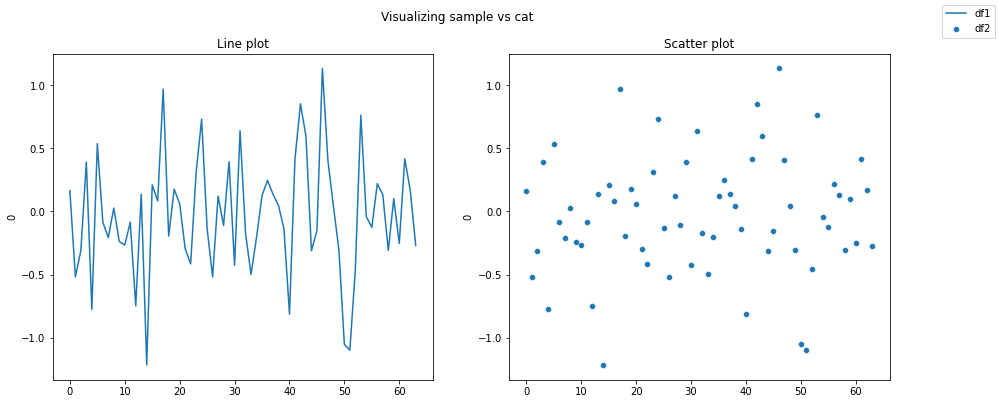

In [11]:
plot_activ(df_mean_cat)

In [12]:
def get_sample(df, cat=None):
    if cat is None:
        return df[df.pred != df.true].sample(n=1)
    else:
        return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)

In [13]:
cat

'http://dbpedia.org/resource/Russia'

In [14]:
sample = get_sample(df, 'http://dbpedia.org/resource/Russia')
sample

C:\Users\maxim\AppData\Local\Temp/ipykernel_7012/370248897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)


,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Wassily_Kandinsky,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,-2.153001,-2.061463,-2.841894,2.269217,-3.10237,0.806452,...,-2.661025,-2.580674,1.843213,2.457368,-2.426313,2.563751,-2.021873,2.998929,-2.717147,2.181712


In [15]:
activations_cols = [x for x in sample.columns if "neuron" in x]
df_act_sample = sample.loc[:, activations_cols]
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Wassily_Kandinsky,-2.153001,-2.061463,-2.841894,2.269217,-3.10237,0.806452,2.09516,-3.173821,1.590645,2.149495,...,-2.661025,-2.580674,1.843213,2.457368,-2.426313,2.563751,-2.021873,2.998929,-2.717147,2.181712


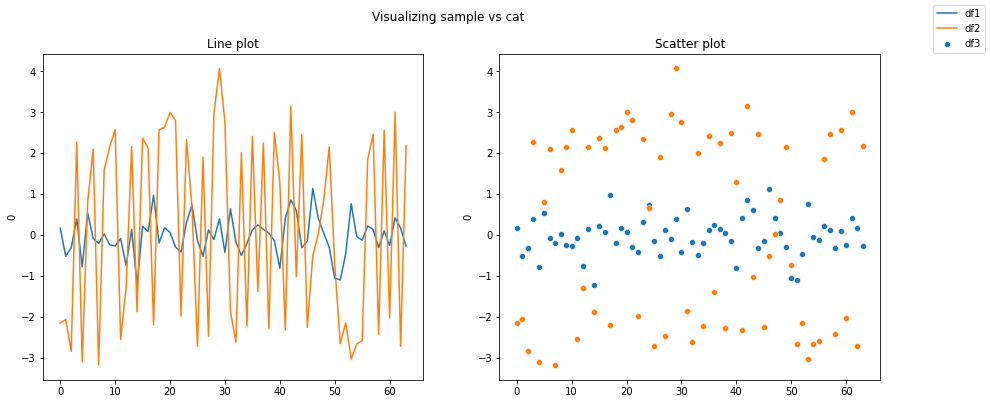

In [16]:
plot_activ(df_mean_cat, df_act_sample)

In [17]:
def get_diffs(df, sample_df):
    return sample_df.reset_index().drop(columns=['index']) - df

In [18]:
diffs = get_diffs(df_mean_cat, df_act_sample)
diffs

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,-2.318339,-1.542441,-2.531889,1.878208,-2.326586,0.269046,2.17955,-2.966781,1.563316,2.387877,...,-2.620249,-2.454816,1.622467,2.324522,-2.117829,2.461449,-1.768666,2.581263,-2.884362,2.451831


In [19]:
avg_diff = abs(diffs).sum().sum()/len(diffs.iloc[0, :])
print(f"Average difference is: {avg_diff}")

Average difference is: 2.1604597568511963


### Re-adjust activations

On rapproche les activations du sample vers les activations de la catégorie cible d'un facteur 10% sur les neurones dont la différence est significative (i.e. pvalue < 0.01).

On a alors besoin de 3 éléments:
* le dataframe des activations du sample
* le dataframe des activations moyennes de la catégorie cible
* le dataframe des pvalues de la catégorie cible (avec maybe l'information sur la significativité de la pvalue, ici fixée à <= 0.01)

In [20]:
russia_pv = pd.read_pickle('src/russia-pv.pkl')
dfrpv = pd.DataFrame(russia_pv, columns=['pvalue'])
dfrpv

,pvalue
0,1.587716e-01
1,4.878287e-09
2,6.452485e-05
3,1.579483e-06
4,1.897656e-13
...,...
59,4.158541e-02
60,3.111701e-04
61,1.502952e-06
62,9.974529e-02


In [21]:
dfrpv['sign'] = dfrpv['pvalue'] <= 0.01
print(dfrpv[dfrpv['sign'] == True].shape)
print(dfrpv[dfrpv['sign'] == True])

(42, 2)
          pvalue  sign
1   4.878287e-09  True
2   6.452485e-05  True
3   1.579483e-06  True
4   1.897656e-13  True
5   2.738027e-11  True
7   3.096681e-03  True
9   3.773218e-03  True
10  1.769776e-03  True
12  1.351876e-13  True
14  7.951155e-24  True
15  2.011291e-03  True
17  6.368204e-23  True
19  6.570767e-03  True
21  5.796425e-05  True
22  3.067940e-07  True
23  5.675254e-05  True
24  1.612688e-10  True
26  9.286252e-11  True
29  1.690230e-06  True
30  3.268496e-09  True
31  1.080565e-11  True
32  5.932947e-03  True
33  1.684570e-11  True
34  2.491615e-03  True
36  2.208312e-03  True
40  4.088773e-18  True
41  3.012649e-08  True
42  1.058638e-14  True
43  6.252875e-12  True
44  2.203407e-05  True
46  1.785589e-24  True
47  9.985386e-08  True
49  9.544518e-05  True
50  1.910548e-19  True
51  2.097827e-18  True
52  8.469099e-08  True
53  1.930613e-16  True
56  2.021712e-03  True
58  6.567423e-05  True
60  3.111701e-04  True
61  1.502952e-06  True
63  2.292984e-04  True


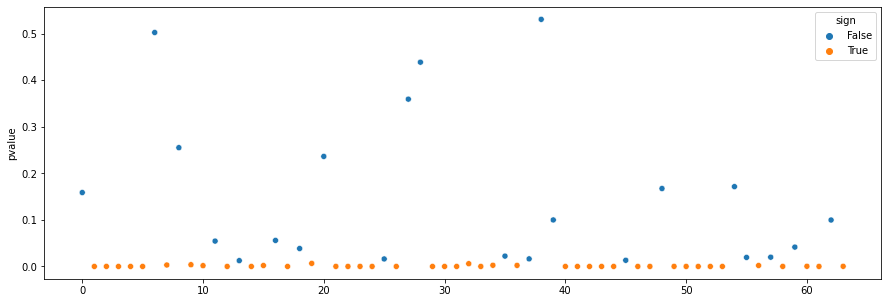

In [22]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=range(len(dfrpv['pvalue'])), y='pvalue', 
                hue='sign', data=dfrpv)
plt.show()

Pvalue dataframe with significant bool value (example for russia here)

In [23]:
dfrpv

,pvalue,sign
0,1.587716e-01,False
1,4.878287e-09,True
2,6.452485e-05,True
3,1.579483e-06,True
4,1.897656e-13,True
...,...,...
59,4.158541e-02,False
60,3.111701e-04,True
61,1.502952e-06,True
62,9.974529e-02,False


In [24]:
df_mean_cat # mean activations for a category (here russia)

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.165338,-0.519022,-0.310005,0.391009,-0.775784,0.537406,-0.08439,-0.20704,0.027329,-0.238381,...,-0.040775,-0.125858,0.220746,0.132845,-0.308484,0.102303,-0.253206,0.417666,0.167214,-0.270119


In [25]:
df_act_sample # activations for a misclassified sample of the category

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Wassily_Kandinsky,-2.153001,-2.061463,-2.841894,2.269217,-3.10237,0.806452,2.09516,-3.173821,1.590645,2.149495,...,-2.661025,-2.580674,1.843213,2.457368,-2.426313,2.563751,-2.021873,2.998929,-2.717147,2.181712


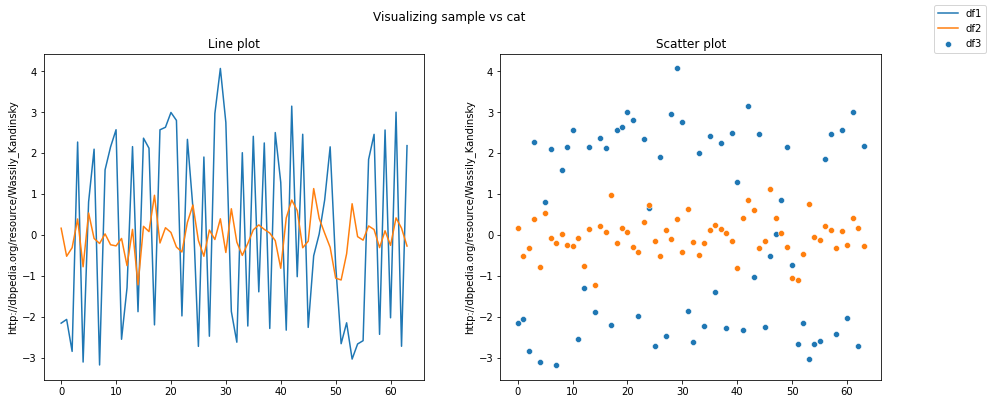

In [26]:
plot_activ(df=df_act_sample, df2=df_mean_cat)
# df in blue
# df2 in orange

In [27]:
dfrpv.set_index(df_act_sample.T.index, inplace=True)
dfrpv

,pvalue,sign
neuron_1,1.587716e-01,False
neuron_2,4.878287e-09,True
neuron_3,6.452485e-05,True
neuron_4,1.579483e-06,True
neuron_5,1.897656e-13,True
...,...,...
neuron_60,4.158541e-02,False
neuron_61,3.111701e-04,True
neuron_62,1.502952e-06,True
neuron_63,9.974529e-02,False


The formula for the new data point is : 

$$ s' = s - d * f $$

where $s'$ is the new value, $s$ is the activation value of the sample, $d$ is the difference between the sample activation and the mean activation (on the same neuron) and $f$ is the factor

In [28]:
def boost(sample, category, pvalue=None):
    """
    both of the 3 elements have the same shape
    pvalues might be reached directly from this function
    """
    
    factor = 0.1 # i.e. 10%
    
    # We built a proper dataset to process the data
    df = pd.concat([sample, category, pvalue]).T
    df.columns = [
        'sample', 'cat', 'pvalue', 'sign'
    ]
    
    df['new_value'] = df['sample']
    
    for i in range(df.shape[0]):
        index = f"neuron_{i+1}"
        if df.loc[index, "sign"] == True:
            df.loc[index, "new_value"] = df.loc[index, 'sample'] - (df.loc[index, 'sample'] - df.loc[index, 'cat']) * factor
    
    return df

In [29]:
dfb = boost(df_act_sample, df_mean_cat, dfrpv.T)
dfb

,sample,cat,pvalue,sign,new_value
neuron_1,-2.153001,0.165338,0.158772,False,-2.153001
neuron_2,-2.061463,-0.519022,0.0,True,-1.907219
neuron_3,-2.841894,-0.310005,0.000065,True,-2.588705
neuron_4,2.269217,0.391009,0.000002,True,2.081396
neuron_5,-3.10237,-0.775784,0.0,True,-2.869711
...,...,...,...,...,...
neuron_60,2.563751,0.102303,0.041585,False,2.563751
neuron_61,-2.021873,-0.253206,0.000311,True,-1.845006
neuron_62,2.998929,0.417666,0.000002,True,2.740803
neuron_63,-2.717147,0.167214,0.099745,False,-2.717147


In [30]:
dfb.fillna(value=dfb[dfb['sign'] == False]['new_value'])

,sample,cat,pvalue,sign,new_value
neuron_1,-2.153001,0.165338,0.158772,False,-2.153001
neuron_2,-2.061463,-0.519022,0.0,True,-1.907219
neuron_3,-2.841894,-0.310005,0.000065,True,-2.588705
neuron_4,2.269217,0.391009,0.000002,True,2.081396
neuron_5,-3.10237,-0.775784,0.0,True,-2.869711
...,...,...,...,...,...
neuron_60,2.563751,0.102303,0.041585,False,2.563751
neuron_61,-2.021873,-0.253206,0.000311,True,-1.845006
neuron_62,2.998929,0.417666,0.000002,True,2.740803
neuron_63,-2.717147,0.167214,0.099745,False,-2.717147


In [31]:
dfb[dfb['sign'] == False]['sample']

neuron_1    -2.153001
neuron_7      2.09516
neuron_9     1.590645
neuron_12   -2.546206
neuron_14    2.157922
neuron_17    2.118684
neuron_19    2.568483
neuron_21    2.991617
neuron_26   -2.719781
neuron_28   -2.471737
neuron_29    2.965743
neuron_36    2.409257
neuron_38    2.247198
neuron_39   -2.282044
neuron_40    2.500887
neuron_46   -2.256542
neuron_49    0.854658
neuron_55   -2.661025
neuron_56   -2.580674
neuron_58    2.457368
neuron_60    2.563751
neuron_63   -2.717147
Name: sample, dtype: object

### Display the new visualization

In [32]:
dfb['sample'].values

array([-2.153000593185425, -2.0614633560180664, -2.8418941497802734,
       2.269216775894165, -3.102369785308838, 0.8064517974853516,
       2.095160484313965, -3.173820972442627, 1.590645432472229,
       2.1494951248168945, 2.569946050643921, -2.546205759048462,
       -1.2874680757522583, 2.15792179107666, -1.872517704963684,
       2.363736867904663, 2.1186838150024414, -2.194843292236328,
       2.568483352661133, 2.630270004272461, 2.991616725921631,
       2.7979583740234375, -1.975808024406433, 2.334930658340454,
       0.6667400002479553, -2.7197811603546143, 1.9035197496414185,
       -2.4717371463775635, 2.96574330329895, 4.065897464752197,
       2.747103691101074, -1.8662916421890259, -2.617906332015991,
       2.0090510845184326, -2.2226128578186035, 2.409256935119629,
       -1.3877266645431519, 2.2471978664398193, -2.282043695449829,
       2.500887393951416, 1.2848056554794312, -2.3237218856811523,
       3.1459789276123047, -1.018182396888733, 2.4591798782348633,
   

In [33]:
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Wassily_Kandinsky,-2.153001,-2.061463,-2.841894,2.269217,-3.10237,0.806452,2.09516,-3.173821,1.590645,2.149495,...,-2.661025,-2.580674,1.843213,2.457368,-2.426313,2.563751,-2.021873,2.998929,-2.717147,2.181712


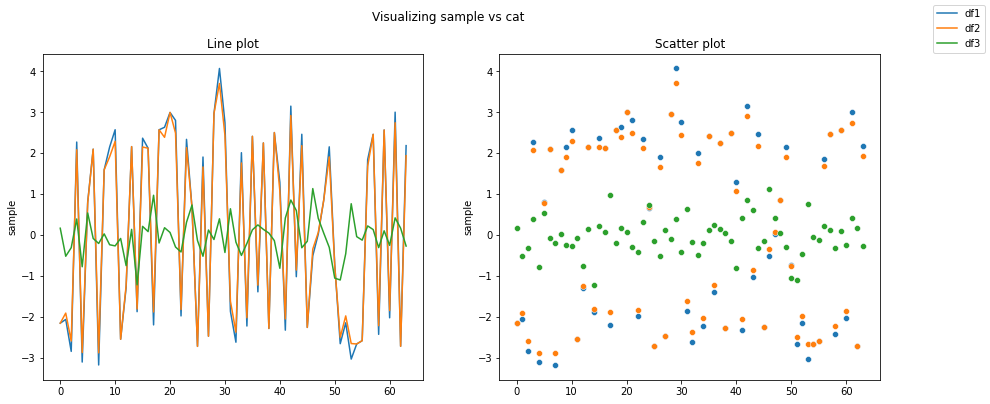

In [34]:
plot_activ(df=pd.DataFrame(dfb['sample']).T, df2=pd.DataFrame(dfb['new_value']).T, df3=pd.DataFrame(dfb['cat']).T)

We see on the visualization above that the second df (i.e. the new value) has became much closer

### Re-build the back of the model and make a prediction

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

Instead of re-building the model as we did to get activations of each layer, we want to build the part after the layer we are getting closer the activations of.

Thus, new computed activations become the inputs for the rest of the model.

In [36]:
rest_model = Sequential()
for i in range(layer_to_explore + 1, len(model.layers)):
    print("Adding", model.layers[i].name, "...")
    rest_model.add(model.layers[i])

rest_model.build(input_shape=rest_model.layers[0].input_shape)

Adding lstm ...
Adding dense ...
Adding dropout ...
Adding dense_1 ...
Adding dense_2 ...


In [37]:
rest_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,361
Trainable params: 5,361
Non-trainable params: 0
_________________________________________________________________


In [38]:
new_activations = dfb['new_value']
rest_model.predict(np.asarray(new_activations).astype('float32'))

ValueError: in user code:

    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (32,)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=float32)
      • training=False
      • mask=None


In [47]:
na = np.array(new_activations).reshape(1, -1)
na.shape

(1, 64)

In [56]:
na.dtype

dtype('float32')

In [57]:
na = np.asarray(na).astype('float32')
na.dtype

dtype('float32')

In [58]:
rest_model.predict(na)

ValueError: in user code:

    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 64), dtype=float32)
      • training=False
      • mask=None


In [59]:
df

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.547359,-0.328434,-0.172445,0.069439,-0.628683,1.294147,...,0.466627,0.293625,-0.208663,-0.316626,-0.006433,-0.412829,0.242208,0.072852,0.725296,-0.755482
http://dbpedia.org/resource/Howardena_Pindell,[http://dbpedia.org/resource/United_States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,-0.013268,-0.407272,-0.204188,-0.182746,1.089036,0.025858,...,-0.173924,-0.007047,0.264012,0.051527,0.053991,0.174592,0.014168,-0.077541,-0.053861,-0.117262
http://dbpedia.org/resource/Étienne_Moreau-Nélaton,[http://dbpedia.org/resource/France],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.934530,0.158398,0.360745,-0.055617,0.112679,0.830497,...,0.515845,0.390358,0.099244,-0.484596,0.420509,-0.408889,0.441760,-0.425881,0.696487,-0.522843
http://dbpedia.org/resource/Albert_Bierstadt,[http://dbpedia.org/resource/http://dbpedia.or...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,-0.456486,-1.654435,-2.019471,1.663355,-2.067222,-1.538896,...,-1.197955,-1.322166,1.637776,1.329710,-1.921764,1.324145,-1.004056,1.800276,-0.940179,0.578950
http://dbpedia.org/resource/Boris_Maluev,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.430946,-1.050859,-0.647471,0.778386,-1.891083,1.960676,...,-0.107760,-0.176884,0.662485,0.214385,-0.725216,0.208538,-0.472626,0.947063,0.447322,-1.074305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://dbpedia.org/resource/Alexis_Simon_Belle,[http://dbpedia.org/resource/France],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.422954,0.263803,0.441082,0.052126,0.068517,0.732049,...,0.209299,0.324361,0.430399,-0.339915,0.012748,-0.158023,0.262765,0.204230,0.399974,-0.518801
http://dbpedia.org/resource/Jazeh_Tabatabai,[http://dbpedia.org/resource/Iran],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.040576,0.129953,-0.476229,0.259859,-0.147263,-0.107531,...,-0.045932,-0.224590,-0.180903,0.121324,-0.236340,0.207463,0.090147,0.113654,-0.171145,0.019107
http://dbpedia.org/resource/Luis_Germán_Cajiga,[http://dbpedia.org/resource/Puerto_Rico],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.210663,0.808387,0.423111,-0.670751,0.492086,0.113561,...,0.258728,0.371111,-0.683634,-0.419296,0.369852,-0.420010,0.348896,-0.440676,0.045091,0.502313
http://dbpedia.org/resource/Bernard_Lorjou,[http://dbpedia.org/resource/France],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.851085,0.592630,0.748333,-0.485598,0.416414,0.851634,...,0.821571,0.726210,-0.362916,-0.727931,0.776207,-0.716643,0.715566,-0.834505,0.669994,-0.381192


In [61]:
inputs = [x for x in df.input]
model.predict(inputs)

206/206 [==============================] - 2s 7ms/step


array([[0.89568514],
       [0.06848241],
       [0.6676162 ],
       ...,
       [0.04908816],
       [0.06894341],
       [0.05051148]], dtype=float32)

In [62]:
type(inputs)

list

In [64]:
ni = [x for x in new_activations]
type(ni)

list

In [67]:
len(ni)

64

In [65]:
rest_model.predict(ni)

ValueError: in user code:

    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (32,)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(32,), dtype=float32)
      • training=False
      • mask=None


In [42]:
[print(i.shape, i.dtype) for i in rest_model.inputs]
[print(o.shape, o.dtype) for o in rest_model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in rest_model.layers]

(None, 150, 64) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
lstm (None, 150, 64) float32
dense (None, 16) float32
dropout (None, 8) float32
dense_1 (None, 8) float32
dense_2 (None, 4) float32


[None, None, None, None, None]